In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
df=pd.read_excel('Data.xlsx') 

In [35]:
#Suppression de la première et des 12 dernières colonnes.Quasiment illisible
df.drop(df.columns[[0,-1,-2,-3,-4,-5,-6,-7,-8,-9,-10,-11,-12]],inplace=True,axis=1)

In [36]:
#Suppression de toutes nos features contenant des valeurs nulles.
df.dropna(axis=1, inplace=True)
df.head()

,ID_litter,sex,group,breed_size,Breed,Litter_size,Dead,Diarr_1m,Diarr_2m,weight_D1,IgG_dam,age_dam
0,10L,M,EL,S,Poodle,1,1,0,0,223,8.412161,6
1,11L,M,OO,S,Lhasa Apso,6,0,1,0,167,6.001322,3
2,11L,F,OL,S,Lhasa Apso,6,0,1,0,165,6.001322,3
3,11L,F,OO,S,Lhasa Apso,6,1,0,0,182,6.001322,3
4,11L,F,OL,S,Lhasa Apso,6,1,0,0,178,6.001322,3


In [37]:
#Les types de nos features
df.dtypes

ID_litter       object
sex             object
group           object
breed_size      object
Breed           object
Litter_size      int64
Dead             int64
Diarr_1m         int64
Diarr_2m         int64
weight_D1        int64
IgG_dam        float64
age_dam          int64
dtype: object

On rend catégoriques les variables qui sont de type object comme l'ID de la portée, le sexe, le groupe, la taille de la race et la taille de la portée.

In [38]:
df['ID_litter']=pd.Categorical(df['ID_litter'],ordered=False)
df['sex']=pd.Categorical(df['sex'],ordered=False)
df['group']=pd.Categorical(df['group'],ordered=False)
df['breed_size']=pd.Categorical(df['breed_size'],ordered=False)
df['Breed']=pd.Categorical(df['Breed'],ordered=False)

In [39]:
first_column = df.pop('Dead') 
df.insert(0, 'Dead', first_column) 
df.head()

,Dead,ID_litter,sex,group,breed_size,Breed,Litter_size,Diarr_1m,Diarr_2m,weight_D1,IgG_dam,age_dam
0,1,10L,M,EL,S,Poodle,1,0,0,223,8.412161,6
1,0,11L,M,OO,S,Lhasa Apso,6,1,0,167,6.001322,3
2,0,11L,F,OL,S,Lhasa Apso,6,1,0,165,6.001322,3
3,1,11L,F,OO,S,Lhasa Apso,6,0,0,182,6.001322,3
4,1,11L,F,OL,S,Lhasa Apso,6,0,0,178,6.001322,3


## Label Encoder

In [40]:
#Labélisation de nos données catégorielles en utilisant la méthode LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df['ID_litter'] = label_encoder.fit_transform(df['ID_litter'])
df['group'] = label_encoder.fit_transform(df['group'])
df['Breed'] = label_encoder.fit_transform(df['Breed'])
df['breed_size'] = label_encoder.fit_transform(df['breed_size'])

df['sex'] = df['sex'].replace(to_replace={'M':1,'F':0})
df.head()


,Dead,ID_litter,sex,group,breed_size,Breed,Litter_size,Diarr_1m,Diarr_2m,weight_D1,IgG_dam,age_dam
0,1,0,1,0,1,9,1,0,0,223,8.412161,6
1,0,1,1,3,1,6,6,1,0,167,6.001322,3
2,0,1,0,2,1,6,6,1,0,165,6.001322,3
3,1,1,0,3,1,6,6,0,0,182,6.001322,3
4,1,1,0,2,1,6,6,0,0,178,6.001322,3


In [41]:
# Dans un premier temps, nous ne gardons que les features originalement numérique. (Litter_size;weigh_D1;IgG_dam;age_dam)
X = df.iloc[:,[6,9,10,11]]
X_KMeans_numeriques = df.iloc[:,[6,9,10,11]].values
y = df.iloc[:,0].values

## Clustering : KMeans

In [42]:
from sklearn.cluster import KMeans
import statistics

### Clustering des 11 features individuellement

In [43]:
# Ici nous utilisons toutes les features complètes (sauf Dead).
X = df.iloc[:,1:]
X_KMeans = df.iloc[:,1:].values
X

,ID_litter,sex,group,breed_size,Breed,Litter_size,Diarr_1m,Diarr_2m,weight_D1,IgG_dam,age_dam
0,0,1,0,1,9,1,0,0,223,8.412161,6
1,1,1,3,1,6,6,1,0,167,6.001322,3
2,1,0,2,1,6,6,1,0,165,6.001322,3
3,1,0,3,1,6,6,0,0,182,6.001322,3
4,1,0,2,1,6,6,0,0,178,6.001322,3
...,...,...,...,...,...,...,...,...,...,...,...
164,33,0,1,1,11,6,0,0,229,4.534240,3
165,33,1,0,1,11,6,0,0,241,4.534240,3
166,33,1,1,1,11,6,1,0,210,4.534240,3
167,33,0,0,1,11,6,1,1,212,4.534240,3


In [44]:
# Clusterisation de nos features une par une suivant la méthode Kmeans.
## dico_cluster_center = {}
dico_variance = {}
for i in range(11):
    model_kmeans = KMeans(n_clusters=2 )
    model_kmeans.fit(X_KMeans[:,i].reshape(-1,1))
    X_predicted = model_kmeans.predict(X_KMeans[:,i].reshape(-1,1))
    print(X.columns[i],"\n",X_predicted)
    ## print(model_kmeans.cluster_centers_)
    ## dico_cluster_center[X.columns[i]] = model_kmeans.cluster_centers_
    # On crée un dictionnaire pour chaques colonnes traitées et on attribue à chaque clé une matrice de taille 2*0 
    dico_variance[X.columns[i]] = [[],[]]
    for j in range(len(X_predicted)): # On parcourt les X_predicted et, selon la valeur (0 ou 1), on range les valeurs dans le dictionnaire pour respecter la clusterisation effectuée plus haut
        if X_predicted[j] == 0:
            dico_variance[X.columns[i]][0].append(X_KMeans[:,i][j])
        else:
            dico_variance[X.columns[i]][1].append(X_KMeans[:,i][j])
    
    # On change les valeurs des matrices par la variance des listes qu'elles contiennent
    dico_variance[X.columns[i]][0] = statistics.variance(dico_variance[X.columns[i]][0])
    dico_variance[X.columns[i]][1] = statistics.variance(dico_variance[X.columns[i]][1])
    # Chaque clé du dictionnaire renseigne la variance intra-cluster (cluster0 et cluster1) de la colonne en question
    
#dico_cluster_center
print("\nVariance intra cluster : ")
dico_variance

ID_litter 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
sex 
 [1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 1 1 1 1 0 1 0 0 0 0 1 1 0 1 1 0 0 1 1
 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0
 1 1 1 1 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 1 1 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0
 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1 0 1 0 1
 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 1]
group 
 [1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 0
 1 1 0 0 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0
 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 1 

{'ID_litter': [18.01740911418331, 27.63809523809524],
 'sex': [0.0, 0.0],
 'group': [0.2525536261491318, 0.253006329113924],
 'breed_size': [0.0, 0.0],
 'Breed': [2.2531578947368422, 3.033894343151005],
 'Litter_size': [1.5454026270702457, 1.120979020979021],
 'Diarr_1m': [0.0, 0.0],
 'Diarr_2m': [0.0, 0.0],
 'weight_D1': [2302.76914503016, 6904.8],
 'IgG_dam': [0.6886470221368511, 2.042612438026801],
 'age_dam': [0.5419501133786848, 0.39254658385093166]}

## DbScan

### 1er groupe : sex , breed_size , Diarr_1m, Diarr_2m

In [45]:
X_1 = X.loc[:,['sex','breed_size','Diarr_1m','Diarr_2m']]

In [46]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
min_samples = X_1.shape[1]+1
dbscan = DBSCAN(eps=3.5, min_samples=min_samples).fit(X_1)
scaler = MinMaxScaler()
df_scaled_1 = pd.DataFrame(scaler.fit_transform(X_1))
df_scaled_1['dbscan'] = dbscan.labels_
df_mean_1 = (df_scaled_1.loc[df_scaled_1.dbscan!=-1, :]
                    .groupby('dbscan').mean())
df_mean_1

,0,1,2,3
dbscan,,,,
0,0.514793,0.715976,0.207101,0.142012


<AxesSubplot:xlabel='dbscan', ylabel='value'>

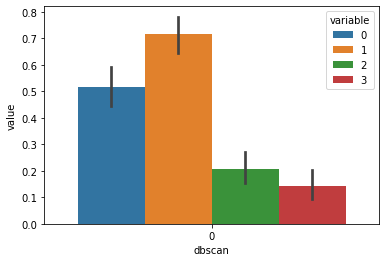

In [47]:
results = pd.DataFrame(columns=['Variable', 'Var'])
for column in df_mean_1.columns[:]:
    results.loc[len(results), :] = [column, np.var(df_mean_1[column])]
selected_columns = list(results.sort_values(
        'Var', ascending=False,
    ).head(7).Variable.values) + ['dbscan']
tidy = df_scaled_1[selected_columns].melt(id_vars='dbscan')
sns.barplot(x='dbscan', y='value', hue='variable', data=tidy)

### 2e groupe : group , IggDam age_dam

In [48]:
X_2 = X.loc[:,['group','IgG_dam','age_dam']]

In [49]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
min_samples = X_2.shape[1]+1
dbscan = DBSCAN(eps=3.5, min_samples=min_samples).fit(X_2)
scaler = MinMaxScaler()
df_scaled_2 = pd.DataFrame(scaler.fit_transform(X_2))
df_scaled_2['dbscan'] = dbscan.labels_
df_scaled_2
df_mean_2 = (df_scaled_2.loc[df_scaled_2.dbscan!=-1, :]
                    .groupby('dbscan').mean())
df_mean_2

,0,1,2
dbscan,,,
0,0.512821,0.343372,0.489152


<AxesSubplot:xlabel='dbscan', ylabel='value'>

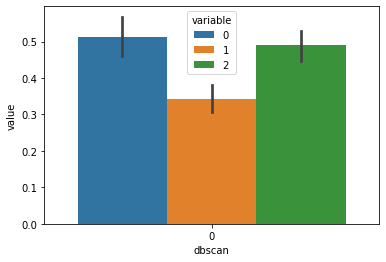

In [50]:
results = pd.DataFrame(columns=['Variable', 'Var'])
for column in df_mean_2.columns[:]:
    results.loc[len(results), :] = [column, np.var(df_mean_2[column])]
selected_columns = list(results.sort_values(
        'Var', ascending=False,
    ).head(7).Variable.values) + ['dbscan']
tidy = df_scaled_2[selected_columns].melt(id_vars='dbscan')
sns.barplot(x='dbscan', y='value', hue='variable', data=tidy)

### 3e groupe : Breed , Litter_size

In [51]:
X_3 = X.loc[:,['Breed','Litter_size']]

In [52]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
min_samples = X_3.shape[1]+1
dbscan = DBSCAN(eps=3.5, min_samples=min_samples).fit(X_3)
scaler = MinMaxScaler()
df_scaled_3 = pd.DataFrame(scaler.fit_transform(X_3))
df_scaled_3['dbscan'] = dbscan.labels_
df_mean_3 = (df_scaled_3.loc[df_scaled_3.dbscan!=-1, :]
                    .groupby('dbscan').mean())
df_mean_3

,0,1
dbscan,,
0,0.525013,0.545036


<AxesSubplot:xlabel='dbscan', ylabel='value'>

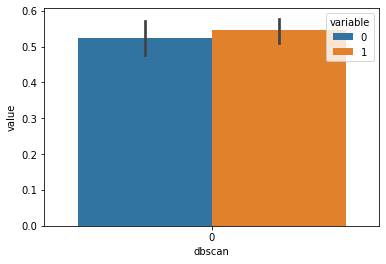

In [53]:
results = pd.DataFrame(columns=['Variable', 'Var'])
for column in df_mean_3.columns[:]:
    results.loc[len(results), :] = [column, np.var(df_mean_3[column])]
selected_columns = list(results.sort_values(
        'Var', ascending=False,
    ).head(7).Variable.values) + ['dbscan']
tidy = df_scaled_3[selected_columns].melt(id_vars='dbscan')
sns.barplot(x='dbscan', y='value', hue='variable', data=tidy)

### 4e groupe : ID_litter , weight_D1

In [54]:
X_4 = X.loc[:,['ID_litter','weight_D1']]

In [55]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
min_samples = X_4.shape[1]+1
dbscan = DBSCAN(eps=3.5, min_samples=min_samples).fit(X_4)
scaler = MinMaxScaler()
df_scaled_4 = pd.DataFrame(scaler.fit_transform(X_4))
df_scaled_4['dbscan'] = dbscan.labels_
df_mean_4 = (df_scaled_4.loc[df_scaled_4.dbscan!=-1, :]
                    .groupby('dbscan').mean())
df_mean_4

,0,1
dbscan,,
0,0.056277,0.165054
1,0.060606,0.132138
2,0.040404,0.192563
3,0.191919,0.090305
4,0.363636,0.245020
5,0.553030,0.328685
6,0.636364,0.366036
7,0.646465,0.519920
8,0.733333,0.222709


<AxesSubplot:xlabel='dbscan', ylabel='value'>

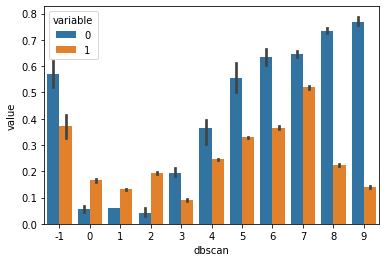

In [56]:
results = pd.DataFrame(columns=['Variable', 'Var'])
for column in df_mean_4.columns[:]:
    results.loc[len(results), :] = [column, np.var(df_mean_4[column])]
selected_columns = list(results.sort_values(
        'Var', ascending=False,
    ).head(7).Variable.values) + ['dbscan']
tidy = df_scaled_4[selected_columns].melt(id_vars='dbscan')
sns.barplot(x='dbscan', y='value', hue='variable', data=tidy)

### Sur les 11 features

In [57]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
min_samples = X.shape[1]+1
dbscan = DBSCAN(eps=3.5, min_samples=min_samples).fit(X)
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(X))
df_scaled['dbscan'] = dbscan.labels_
df_mean = (df_scaled.loc[: , :]
                    .groupby('dbscan').mean())
df_mean

,0,1,2,3,4,5,6,7,8,9,10
dbscan,,,,,,,,,,,
-1,0.530751,0.514793,0.512821,0.715976,0.525013,0.545036,0.207101,0.142012,0.341651,0.343372,0.489152


On trouve un cluster à -1 mais il est dit sur le site que cela correspond à du bruit et donc à ignorer.